<a href="https://colab.research.google.com/github/youssef-mostafa/Udacity-/blob/main/NYC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
#First, let's read in the data and necessary libraries.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
%matplotlib inline


In [3]:

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/listings.csv')
df.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (17) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75356,-73.98559,Entire home/apt,150,30,48,2019-11-04,0.33,3,338,0,NaN
1,3831,"Whole flr w/private bdrm, bath & kitchen(pls r...",4869,LisaRoxanne,Brooklyn,Bedford-Stuyvesant,40.68494,-73.95765,Entire home/apt,75,1,409,2021-10-22,4.86,1,194,32,NaN
2,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68535,-73.95512,Private room,60,30,50,2016-06-05,0.52,2,365,0,NaN
3,5136,"Spacious Brooklyn Duplex, Patio + Garden",7378,Rebecca,Brooklyn,Sunset Park,40.66265,-73.99454,Entire home/apt,275,5,2,2021-08-08,0.02,1,123,1,NaN
4,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Midtown,40.76457,-73.98317,Private room,68,2,507,2021-11-08,3.68,1,192,33,NaN


In [5]:
def get_description(df):
    '''
    INPUT - schema - pandas dataframe with the schema of the developers survey
            column_name - string - the name of the column you would like to know about
    OUTPUT - 
            desc - string - the description of the column
    '''
    desc = df.describe()
    return desc


get_description(df) # This should return description of columns in dataframe

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,3.827700e+04,3.827700e+04,38277.000000,38277.000000,38277.000000,38277.000000,38277.000000,28773.000000,38277.000000,38277.000000,38277.000000
mean,2.962239e+07,1.148305e+08,40.729206,-73.948967,170.858714,21.623769,23.302871,1.721019,17.747655,134.290984,5.032160
std,1.742239e+07,1.299194e+08,0.055752,0.050759,305.100271,29.573333,50.415484,4.399826,59.150451,143.196175,14.693768
min,2.595000e+03,2.438000e+03,40.504560,-74.249840,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000
25%,1.341048e+07,1.139462e+07,40.689260,-73.983270,70.000000,3.000000,1.000000,0.120000,1.000000,0.000000,0.000000
50%,3.081269e+07,5.005297e+07,40.725180,-73.954770,114.000000,30.000000,4.000000,0.480000,1.000000,73.000000,0.000000
75%,4.642855e+07,2.002395e+08,40.762680,-73.930430,189.000000,30.000000,20.000000,1.780000,3.000000,302.000000,3.000000
max,5.366510e+07,4.344080e+08,40.914020,-73.710870,10000.000000,1250.000000,1009.000000,141.000000,421.000000,365.000000,669.000000


In [6]:
num_rows = df.shape[0] #Provide the number of rows in the dataset
num_cols = df.shape[1] #Provide the number of columns in the dataset
num_rows,num_cols

(38277, 18)

In [7]:
#Provide a set of columns with 0 missing values.
no_nulls = set(df.columns[df.isnull().mean()==0])
no_nulls

{'availability_365',
 'calculated_host_listings_count',
 'host_id',
 'id',
 'latitude',
 'longitude',
 'minimum_nights',
 'neighbourhood',
 'neighbourhood_group',
 'number_of_reviews',
 'number_of_reviews_ltm',
 'price',
 'room_type'}

In [8]:
#Provide a set of columns with more than 20% of the values missing
most_missing_cols = set(df.columns[df.isnull().mean() > 0.2])
most_missing_cols

{'last_review', 'license', 'reviews_per_month'}

*   All the data regarding the area and location have no mssing value  

*   The rest of the column have less than 20% missing values

*   Only the column **License** has more than 20% missing values so we will not use it in our analysis 




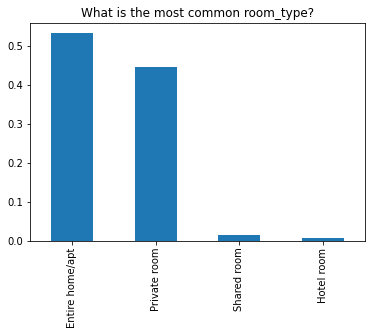

In [9]:
room_type_count = df.room_type.value_counts()#Provide a pandas series of the counts for each room type

# The below should be a bar chart of the proportion of each type of room 

p=(room_type_count/df.shape[0]).plot(kind="bar");
plt.title("What is the most common room_type?");

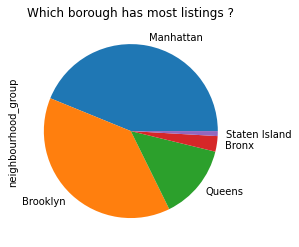

In [10]:
neighbourhood_group = df.neighbourhood_group.value_counts()#Provide a pandas series of the counts for different boroughs

# The below should be a pie chart of the proportion of each borough

(neighbourhood_group/df.shape[0]).plot(kind="pie");
plt.title("Which borough has most listings ?");
plt.show()

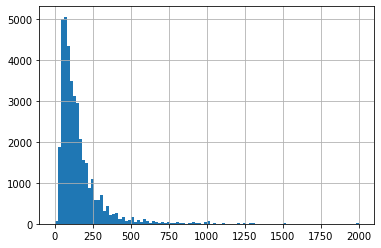

In [12]:
df.price.hist(bins=100,range=[0,2000]) # The below should be a histogram distribution of the prices